In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm as mpl_colormaps
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns

from collections import namedtuple

import torch
import torchvision.utils as vutils
import torchvision.transforms.functional as T
from torch.utils.data import DataLoader
from torchvision import transforms

%matplotlib inline
sns.set_context('talk', font_scale=1.2, rc={'lines.linewidth': 1.5})
np.set_printoptions(suppress=True,precision=4)

<AxesSubplot:>

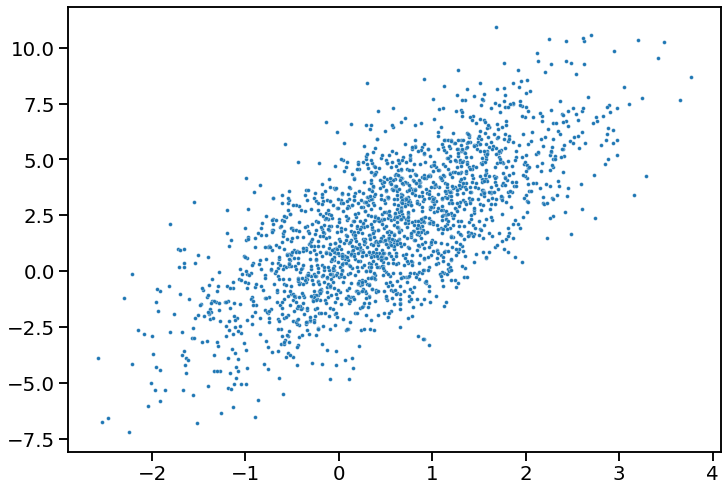

In [21]:
N = 2000
z1 = np.random.normal(0.5, 1, N)
z2 = np.random.normal(2*z1 + 1, 2, N)

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.2)
sns.scatterplot(x=z1, y=z2, ax=ax, s=15)

In [12]:
np.concatenate([z1,z2], axis=1).shape

(2000, 2)

In [25]:
cd D:\\Saarbrucken\\EDA_Research\\vae-disentanglement\\disentanglement_lib_pl

D:\Saarbrucken\EDA_Research\vae-disentanglement\disentanglement_lib_pl


In [30]:
import pickle
from common import dag_utils
from torch import nn

In [28]:
al = pickle.load(open("D:\\Saarbrucken\\EDA_Research\\vae-disentanglement\\adjacency_matrices\\pendulum.pkl", "rb"))

In [32]:
A = dag_utils.get_adj_mat_from_adj_list(al['adj_mat'])

In [41]:
projection = nn.Linear(2, 2)
projection.weight.data = torch.Tensor([[1.0, 0.0], [0.0, 1.0]])
projection.bias.data = torch.Tensor([0.0, 0.0])


In [42]:
A

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 1., 1., 0.],
        [1., 1., 0., 1.]])

In [43]:
T = torch.arange(0,8).type(torch.FloatTensor).reshape(1,4,2)
print(T)

tensor([[[0., 1.],
         [2., 3.],
         [4., 5.],
         [6., 7.]]])


In [45]:
projected_node_feats = projection(T)
print(projected_node_feats)

tensor([[[0., 1.],
         [2., 3.],
         [4., 5.],
         [6., 7.]]], grad_fn=<AddBackward0>)


In [48]:
node_feats_merged = torch.matmul(A, projected_node_feats)
print(node_feats_merged)

tensor([[[ 0.,  1.],
         [ 2.,  3.],
         [ 6.,  9.],
         [ 8., 11.]]], grad_fn=<CopyBackwards>)


In [49]:
num_neighbours = A.sum(dim=-1, keepdims=True)
print(num_neighbours)

tensor([[1.],
        [1.],
        [3.],
        [3.]])


In [50]:
node_feats_merged / num_neighbours

tensor([[[0.0000, 1.0000],
         [2.0000, 3.0000],
         [2.0000, 3.0000],
         [2.6667, 3.6667]]], grad_fn=<DivBackward0>)